In [ ]:

#Reconhecimento de padrões
#Introdução; Extração de Características; Aprendizagem Não Supervisionada;
#Classificação de padrões e regressão de funções; Avaliação de técnicas de
#classificação e testes estatísticos; Tratamento dos dados; Projeto.
#1. Introdução V
#2. Mineração de dados V
#3. Indução, Aprendizado de Máquina: Conceitos, Instâncias, e Atributos V
#4. Técnicas de AM Supervisionadas: k-NN, Naive, e Árvores de Decisão V
#5. Pré-processamento V
#6. Seleção de Atributos
#7. PCA (Principal Component Analysis)
#8. Análise de Agrupamento: k-means e Hierárquico
#9. Distribuição de Probabilidade
#10. Expectation-Maximization
#11. Análise de Agrupamento
#12. Validação de Agrupamentos
#13. Support Vector Machines
#14. Variações do Gradiente Descendente (Backpropagation)
#15. Multi-Classificadores (Ensembles): Bagging, Boosting, Stacking, outros
#16. Validação de Métodos de AM Supervisionado
#17. Testes de hipótese

In [ ]:
#importando bibliotecas
import os
import glob
import warnings
from pathlib import  Path 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from matplotlib import pyplot as plt
from warnings import simplefilter
import scikitplot as skplt   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from google.colab import  files
from sqlalchemy import  create_engine
import random
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn_pandas import DataFrameMapper
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from NBprocessing import NBcategorical
from NBprocessing import NBcontinuous
from NBprocessing import NBplot
from NBprocessing import NBgeneral
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn import  svm
from pandas.api.types import is_numeric_dtype
from pandas.plotting import parallel_coordinates
%matplotlib inline
import geopandas as gpd  
import geoplot as gplt 
import cufflinks as cf
import sklearn as sk
import statsmodels.api as sm 
from plotly.offline import plot
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import category_encoders as ce
from pandas_profiling import ProfileReport
from sklearn import cluster
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
import pydotplus 
from IPython.display import Image
import datetime as dt
from scipy import stats
from sklearn.decomposition import PCA
import matplotlib.image as mpimg


In [ ]:
%config Completer.use_jedi = False
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Config option `use_jedi` not recognized by `IPCompleter`.



In [ ]:
simplefilter(action="ignore",category=FutureWarning)

In [ ]:
!pip install scikit-plot

In [ ]:
!pip install NBprocessing

In [ ]:
!pip install geopandas

In [ ]:
!pip install geoplot

In [ ]:
!pip install --upgrade category_encoders

In [ ]:
#importar dados do google drive para o Colab
drive.mount('/content/drive')
# Insert the directory
import sys
sys.path.insert(0,'/content/gdrive/My Drive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#DADOS PRINCIPAIS
#Fazenso analize do pré-processamento de dados alunoDeficiencia, incluindo limpeza de dados 
#(para lidar com valores faltantes e remover outliers, bem como dados duplicados), agregação, amostragem,
# discretização e redução de dimensionalidade usando a análise de componentes principais.

In [ ]:
#Criando um dicionário, onde cada chave representa uma coluna
#Evolução de alunos matriculados
#Inserindo um dataframe com os dados de alunos com deficiência, alunos totais nos últimos censos 
#(explicar de onde vem os dados, fonte)

dados_gerais = {
'Ano': [2015, 2016, 2017, 2018, 2019],
'Aluno_co_Deficiencia': [51685, 49813, 52542, 59496, 66750],
'Aluno_total':[ 11187296, 11449222, 11589194, 12043993, 16425302],
'Populacao_total': [203475683, 205156587, 206804741, 208494900,210147122]
}
#Criando o dataframe
df_dados_gerais = pd.DataFrame(dados_gerais, columns=['Ano','Aluno_co_Deficiencia','Aluno_total','Populacao_total'])
df_dados_gerais


#dados_gerais = pd.read_csv('/content/drive/MyDrive/alunoDeficiencia/alunodeficiencia_2019.csv',sep=',', encoding='latin-1')
#dados_gerais

,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total
0,2015,51685,11187296,203475683
1,2016,49813,11449222,205156587
2,2017,52542,11589194,206804741
3,2018,59496,12043993,208494900
4,2019,66750,16425302,210147122


In [ ]:
#Inserindo uma coluna com a porcentagem para saber a proporção dos alunos com deficiência em relação ao total de alunos
df_dados_gerais['Porcentagem'] = df_dados_gerais['Aluno_co_Deficiencia'] / df_dados_gerais['Aluno_total'] * 100
df_dados_gerais

,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total,Porcentagem
0,2015,51685,11187296,203475683,0.461997
1,2016,49813,11449222,205156587,0.435078
2,2017,52542,11589194,206804741,0.453371
3,2018,59496,12043993,208494900,0.493989
4,2019,66750,16425302,210147122,0.406385


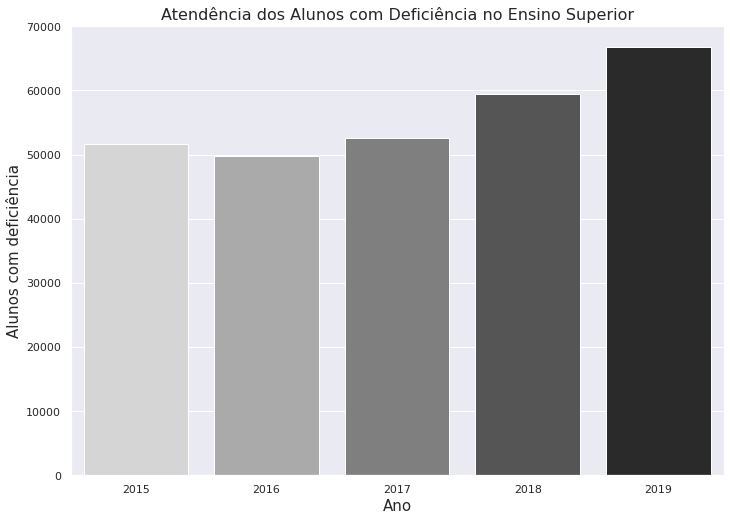

In [ ]:
#Gráfico de evolução de alunos com deficiência no ensino superior
sns.set(rc={'figure.figsize':(11.7,8.27)})
evolucao_alunoscomdeficiencia = sns.barplot(data=df_dados_gerais, x='Ano', y='Aluno_co_Deficiencia', palette='gist_gray_r')
plt.title("Atendência dos Alunos com Deficiência no Ensino Superior", loc="center", fontsize=16)
plt.xlabel('Ano', fontsize=15), plt.ylabel('Alunos com deficiência', fontsize=15)
plt.savefig('evolucao_alunoscomdeficiencia.png', transparent = True)

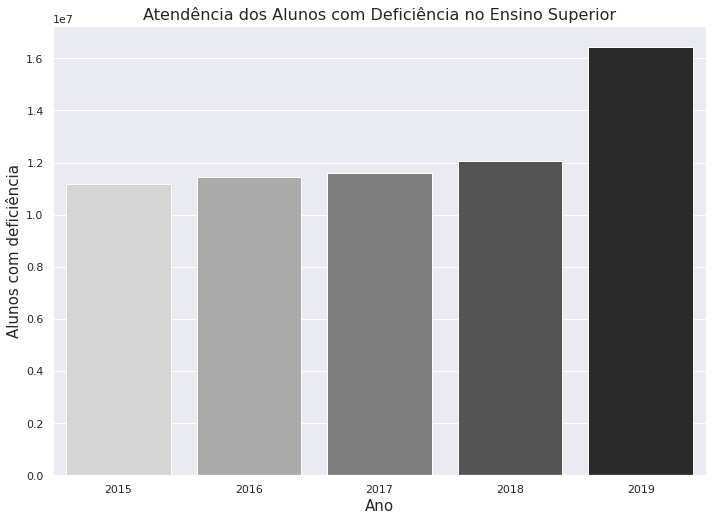

In [ ]:
#Gráfico de evolução de alunos com deficiência comparado ao total de alunos
sns.set(rc={'figure.figsize':(11.7,8.27)})
evolucao_alunos = sns.barplot(data=df_dados_gerais, x='Ano', y='Aluno_total', palette='gist_gray_r')
plt.title("Atendência dos Alunos com Deficiência no Ensino Superior", loc="center", fontsize=16)
plt.xlabel('Ano', fontsize=15), plt.ylabel('Alunos com deficiência', fontsize=15)
plt.savefig('evolucao_alunos.png', transparent = True)

In [ ]:
#Inserindo um percentual de evolução anual no dataframe
df_dados_gerais['Valor_inicial'] = df_dados_gerais['Aluno_co_Deficiencia'].shift()
df_dados_gerais['Valor_final'] = df_dados_gerais['Aluno_co_Deficiencia']
df_dados_gerais['Tendência_crescimento_anual'] = (df_dados_gerais['Valor_final'] - df_dados_gerais['Valor_inicial']) * 100/ df_dados_gerais['Valor_inicial']
df_dados_gerais

,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total,Valor_inicial,Valor_total,Valor_final,Evolucao_anual,Tendência_crescimento_anual
0,2015,51685,11187296,203475683,NaN,51685,51685,NaN,NaN
1,2016,49813,11449222,205156587,51685.0,49813,49813,-3.621941,-3.621941
2,2017,52542,11589194,206804741,49813.0,52542,52542,5.478490,5.478490
3,2018,59496,12043993,208494900,52542.0,59496,59496,13.235126,13.235126
4,2019,66750,16425302,210147122,59496.0,66750,66750,12.192416,12.192416


In [ ]:
#Corriginos valosres nulos
df_dados_gerais.isna().sum().sum()

3

In [ ]:
#mostrar os valores nulos
df_dados_gerais[df_dados_gerais.isna().any(axis=1)]

,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total,Valor_inicial,Valor_total,Valor_final,Evolucao_anual,Tendência_crescimento_anual
0,2015,51685,11187296,203475683,NaN,51685,51685,NaN,NaN


In [ ]:
#Verificar dados ausentes
#Análisando podemos ver que não temos valores ausentes nos nossos dados
dadosAusentes=pd.DataFrame((df_dados_gerais.isnull().sum())/df_dados_gerais.shape[0],columns=["Valores Ausentes"])
dadosAusentes.columns.name="Variaveis"
dadosAusentes

Variaveis,Valores Ausentes
Ano,0.0
Aluno_co_Deficiencia,0.0
Aluno_total,0.0
Populacao_total,0.0
Valor_inicial,0.2
Valor_total,0.0
Valor_final,0.0
Evolucao_anual,0.2
Tendência_crescimento_anual,0.2


In [ ]:
#Ver o resumo estatístico do DataFrame
#Trocador de formato dos recursos de descrição para legibilidade 
df_dados_gerais.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total,Valor_inicial,Valor_total,Valor_final,Evolucao_anual,Tendência_crescimento_anual
count,5,5,5,5,4,5,5,4,4
mean,2017,56057.2,1.2539e+07,2.06816e+08,53384,56057.2,56057.2,6.82102,6.82102
std,1.58114,7011.14,2.19461e+06,2.63755e+06,4231,7011.14,7011.14,7.76424,7.76424
min,2015,49813,1.11873e+07,2.03476e+08,49813,49813,49813,-3.62194,-3.62194
25%,2016,51685,1.14492e+07,2.05157e+08,51217,51685,51685,3.20338,3.20338
50%,2017,52542,1.15892e+07,2.06805e+08,52113.5,52542,52542,8.83545,8.83545
75%,2018,59496,1.2044e+07,2.08495e+08,54280.5,59496,59496,12.4531,12.4531
max,2019,66750,1.64253e+07,2.10147e+08,59496,66750,66750,13.2351,13.2351


In [ ]:
numerica_col = list(df_dados_gerais._get_numeric_data().columns)
nao_numerica_col = [col for col in df_dados_gerais.columns if col not in numerica_col]

In [ ]:
print("Numerica_col:\n",numerica_col)
print("\nNao_numerica_col:\n",nao_numerica_col)

Numerica_col:
 ['Ano', 'Aluno_co_Deficiencia', 'Aluno_total', 'Populacao_total', 'Valor_inicial', 'Valor_total', 'Valor_final', 'Evolucao_anual', 'Tendência_crescimento_anual']

Nao_numerica_col:
 []


In [ ]:
df_dados_gerais.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ano                          5 non-null      int64  
 1   Aluno_co_Deficiencia         5 non-null      int64  
 2   Aluno_total                  5 non-null      int64  
 3   Populacao_total              5 non-null      int64  
 4   Valor_inicial                4 non-null      float64
 5   Valor_total                  5 non-null      int64  
 6   Valor_final                  5 non-null      int64  
 7   Evolucao_anual               4 non-null      float64
 8   Tendência_crescimento_anual  4 non-null      float64
dtypes: float64(3), int64(6)
memory usage: 488.0 bytes


In [ ]:
#Vamos verificar se todos os recursos têm uma quantidade suficiente de dados
for dados in df_dados_gerais:
    print(f"No recurso, {dados} o numero de valores exclusivos é : {df_dados_gerais[dados].nunique()}")

No recurso, Ano o numero de valores exclusivos é : 5
No recurso, Aluno_co_Deficiencia o numero de valores exclusivos é : 5
No recurso, Aluno_total o numero de valores exclusivos é : 5
No recurso, Populacao_total o numero de valores exclusivos é : 5
No recurso, Valor_inicial o numero de valores exclusivos é : 4
No recurso, Valor_total o numero de valores exclusivos é : 5
No recurso, Valor_final o numero de valores exclusivos é : 5
No recurso, Evolucao_anual o numero de valores exclusivos é : 4
No recurso, Tendência_crescimento_anual o numero de valores exclusivos é : 4


In [ ]:
#categoria:Esta função permite ao usuário entender melhor a distribuição das categorias em cada recurso.
#Ele plota uma tabela com todas as características de entrada e a porção de cada categoria do recurso. Para ver melhor 
#as características desequilibradas, ele traça 90% e categorias superiores na cor vermelha. 
# Se nenhum recurso for selecionado, ele irá traçar todos os recursos do conjunto de dados.
NBcategorical.category_ratio(df_dados_gerais)

,0,1,2,3,4
Ano,2015 : 20.0%,2016 : 20.0%,2017 : 20.0%,2018 : 20.0%,2019 : 20.0%
Aluno_co_Deficiencia,51685 : 20.0%,49813 : 20.0%,52542 : 20.0%,59496 : 20.0%,66750 : 20.0%
Aluno_total,11187296 : 20.0%,11449222 : 20.0%,11589194 : 20.0%,12043993 : 20.0%,16425302 : 20.0%
Populacao_total,203475683 : 20.0%,205156587 : 20.0%,206804741 : 20.0%,208494900 : 20.0%,210147122 : 20.0%
Valor_inicial,51685.0 : 25.0%,49813.0 : 25.0%,52542.0 : 25.0%,59496.0 : 25.0%,0.00
Valor_total,51685 : 20.0%,49813 : 20.0%,52542 : 20.0%,59496 : 20.0%,66750 : 20.0%
Valor_final,51685 : 20.0%,49813 : 20.0%,52542 : 20.0%,59496 : 20.0%,66750 : 20.0%
Evolucao_anual,-3.6219406017219695 : 25.0%,5.478489550920442 : 25.0%,13.235126184766473 : 25.0%,12.192416296893908 : 25.0%,0.00
Tendência_crescimento_anual,-3.6219406017219695 : 25.0%,5.478489550920442 : 25.0%,13.235126184766473 : 25.0%,12.192416296893908 : 25.0%,0.00


In [ ]:
#Tipos de dados do dataframe
df_dados_gerais.dtypes

Ano                              int64
Aluno_co_Deficiencia             int64
Aluno_total                      int64
Populacao_total                  int64
Valor_inicial                  float64
Valor_total                      int64
Valor_final                      int64
Evolucao_anual                 float64
Tendência_crescimento_anual    float64
dtype: object

In [ ]:
#Agregações: Min, Max e Everything In Between
df_dados_gerais.dropna().describe()

,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total,Valor_inicial,Valor_total,Valor_final,Evolucao_anual,Tendência_crescimento_anual
count,4.000000,4.00000,4.000000e+00,4.000000e+00,4.000000,4.00000,4.00000,4.000000,4.000000
mean,2017.500000,57150.25000,1.287693e+07,2.076508e+08,53384.000000,57150.25000,57150.25000,6.821023,6.821023
std,1.290994,7587.90592,2.379169e+06,2.151050e+06,4231.002639,7587.90592,7587.90592,7.764244,7.764244
min,2016.000000,49813.00000,1.144922e+07,2.051566e+08,49813.000000,49813.00000,49813.00000,-3.621941,-3.621941
25%,2016.750000,51859.75000,1.155420e+07,2.063927e+08,51217.000000,51859.75000,51859.75000,3.203382,3.203382
50%,2017.500000,56019.00000,1.181659e+07,2.076498e+08,52113.500000,56019.00000,56019.00000,8.835453,8.835453
75%,2018.250000,61309.50000,1.313932e+07,2.089080e+08,54280.500000,61309.50000,61309.50000,12.453094,12.453094
max,2019.000000,66750.00000,1.642530e+07,2.101471e+08,59496.000000,66750.00000,66750.00000,13.235126,13.235126


In [ ]:
#Explorando dados estatísticos do dataframe
df_dados_gerais.describe() 

,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total,Valor_inicial,Valor_total,Valor_final,Evolucao_anual,Tendência_crescimento_anual
count,5.000000,5.000000,5.000000e+00,5.000000e+00,4.000000,5.000000,5.000000,4.000000,4.000000
mean,2017.000000,56057.200000,1.253900e+07,2.068158e+08,53384.000000,56057.200000,56057.200000,6.821023,6.821023
std,1.581139,7011.136049,2.194609e+06,2.637545e+06,4231.002639,7011.136049,7011.136049,7.764244,7.764244
min,2015.000000,49813.000000,1.118730e+07,2.034757e+08,49813.000000,49813.000000,49813.000000,-3.621941,-3.621941
25%,2016.000000,51685.000000,1.144922e+07,2.051566e+08,51217.000000,51685.000000,51685.000000,3.203382,3.203382
50%,2017.000000,52542.000000,1.158919e+07,2.068047e+08,52113.500000,52542.000000,52542.000000,8.835453,8.835453
75%,2018.000000,59496.000000,1.204399e+07,2.084949e+08,54280.500000,59496.000000,59496.000000,12.453094,12.453094
max,2019.000000,66750.000000,1.642530e+07,2.101471e+08,59496.000000,66750.000000,66750.000000,13.235126,13.235126


<Figure size 504x288 with 0 Axes>

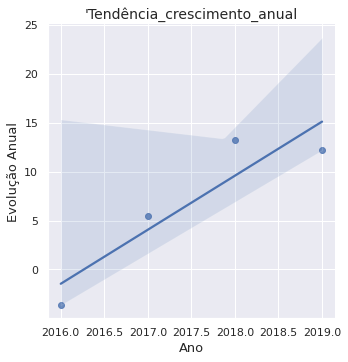

In [ ]:
#Visualizando a evolução com um Line Plot
plt.figure(figsize =(7, 4))
sns.lmplot(x='Ano',y='Tendência_crescimento_anual',data=df_dados_gerais)
plt.title("'Tendência_crescimento_anual", loc="center", fontsize=14)
plt.xlabel('Ano', fontsize=13), plt.ylabel('Evolução Anual', fontsize=13)
plt.savefig('evolucao_anual.png', transparent = True)


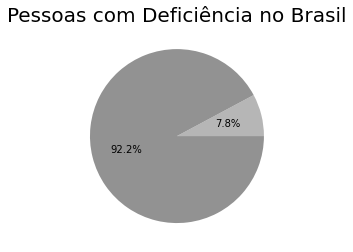

In [ ]:
#Proporções de pessoas com deficiência no Brasil e no ensino superior 2019
plt.figure(figsize = (6,4))
brasil = [16425302,(210147122-16425302)]
colors = sns.color_palette("gist_gray_r")[1:]
brasil = plt.pie(brasil, colors=colors,autopct='%.1f%%')
plt.title("Pessoas com Deficiência no Brasil", loc="center", fontsize=20)
plt.savefig('pessoas_brasil.png', transparent = True)


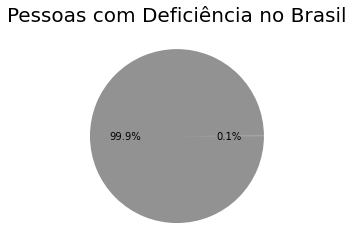

In [ ]:
#Proporções de pessoas com deficiência no Brasil e no ensino superior 2018
plt.figure(figsize = (6,4))
brasil = [1204399,(2084949221-204399)]
colors = sns.color_palette("gist_gray_r")[1:]
brasil = plt.pie(brasil, colors=colors,autopct='%.1f%%')
plt.title("Pessoas com Deficiência no Brasil", loc="center", fontsize=20)
plt.savefig('pessoas_brasil.png', transparent = True)

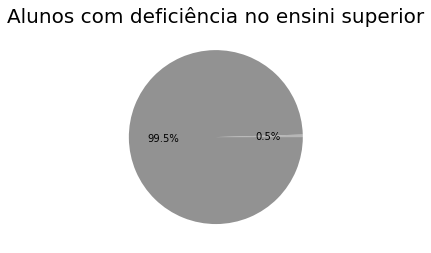

In [ ]:
plt.figure(figsize = (5,4))
brasil = [76750,(16525302-76750)]
colors = sns.color_palette("gist_gray_r")[1:]
plt.pie(brasil, colors=colors, autopct='%.1f%%')
plt.title("Alunos com deficiência no ensini superior", loc="center", fontsize=20)
plt.savefig('alunos_ensino_superior.png', transparent = True)


In [ ]:
#Outliers são instâncias de dados com características consideravelmente diferentes do restante do conjunto de 
#dados. No código de exemplo abaixo, desenharemos um boxplot para identificar as colunas na tabela que contêm 
#valores discrepantes. Observe que os valores em todas as colunas (ANO') são originalmente 
#armazenados como 'int64' enquanto os valores na coluna 'ANO' são armazenados como objetos string 
#(já que a coluna inicialmente contém strings como '?' para representando valores ausentes). Assim, devemos 
#primeiro converter a coluna em valores numéricos antes de criar o boxplot. Caso contrário, a coluna não será 
#exibida ao desenhar o boxplot. 

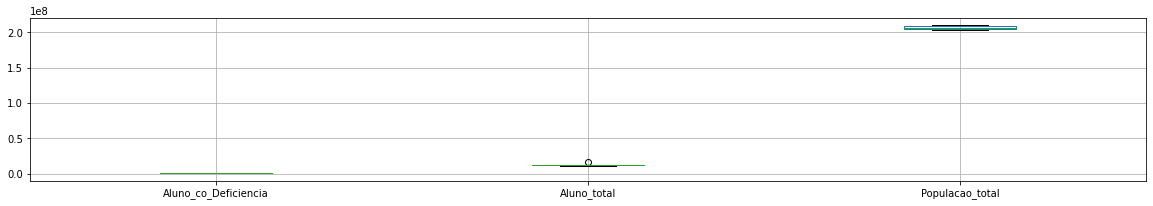

In [ ]:
dados2 = df_dados_gerais.drop(['Ano'],axis=1)
dados2['Populacao_total'] = pd.to_numeric(dados2['Populacao_total'])
dados2.boxplot(figsize=(20,3))

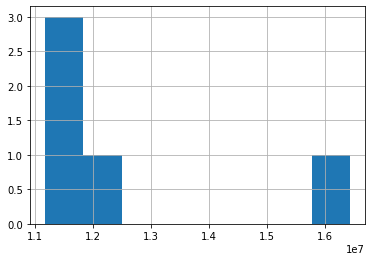

In [ ]:
df_dados_gerais['Aluno_total'].hist(bins=8)

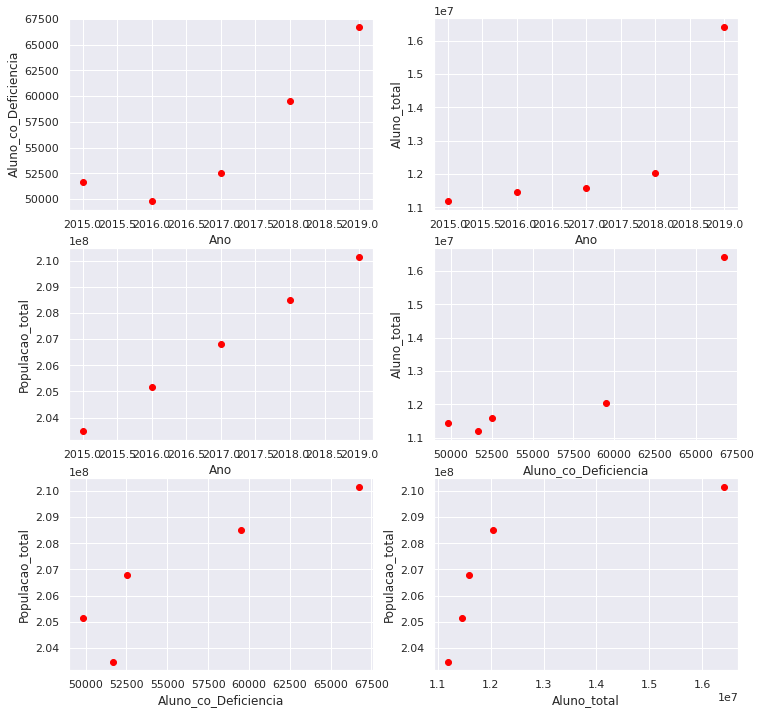

In [ ]:
#Para cada par de atributos, podemos usar um gráfico de dispersão para visualizar sua distribuição 
#conjunta.

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(dados_gerais[df_dados_gerais.columns[i]], df_dados_gerais[df_dados_gerais.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(df_dados_gerais.columns[i])
        axes[ax1][ax2].set_ylabel(df_dados_gerais.columns[j])
        index = index + 1

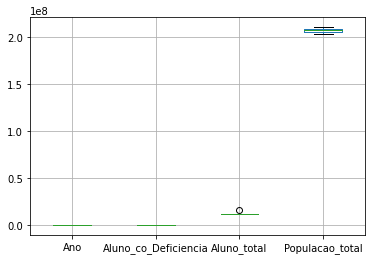

In [ ]:
#mostrar a distribuição de valores para cada atributo.
df_dados_gerais.boxplot()

In [ ]:
dups = df_dados_gerais.duplicated()
print('Número de linhas duplicadas = %d' % (dups.sum()))
df_dados_gerais.loc[[3,3]]

Número de linhas duplicadas = 0


,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total,Valor_inicial,Valor_total,Valor_final,Evolucao_anual,Tendência_crescimento_anual
3,2018,59496,12043993,208494900,52542.0,59496,59496,13.235126,13.235126
3,2018,59496,12043993,208494900,52542.0,59496,59496,13.235126,13.235126


In [ ]:
print('Número de linhas antes de descartar duplicatas = %d' % (df_dados_gerais.shape[0]))
dados2 = df_dados_gerais.drop_duplicates()
print('Número de linhas após descartar duplicatas = %d' % (dados2.shape[0]))

Número de linhas antes de descartar duplicatas = 5
Número de linhas após descartar duplicatas = 5


In [ ]:
#A amostragem é uma abordagem comumente usada para facilitar (1) a redução de dados para análise
# exploratória de dados e a ampliação de algoritmos para aplicações de big data e (2) quantificar 
#incertezas devido a diferentes distribuições de dados. Existem vários métodos disponíveis para 
#amostragem de dados, como amostragem sem substituição, onde cada instância selecionada é removida 
#do conjunto de dados e amostragem com substituição, onde cada instância selecionada não é removida, 
#permitindo que ela seja selecionada mais de uma vez na amostra.
#Aplicaremos amostragem com substituição e sem substituição ao conjunto de dados do câncer de mama 
#obtido no repositório de aprendizagem de máquina da UCI.
df_dados_gerais.head()

,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total,Valor_inicial,Valor_total,Valor_final,Evolucao_anual,Tendência_crescimento_anual
0,2015,51685,11187296,203475683,NaN,51685,51685,NaN,NaN
1,2016,49813,11449222,205156587,51685.0,49813,49813,-3.621941,-3.621941
2,2017,52542,11589194,206804741,49813.0,52542,52542,5.478490,5.478490
3,2018,59496,12043993,208494900,52542.0,59496,59496,13.235126,13.235126
4,2019,66750,16425302,210147122,59496.0,66750,66750,12.192416,12.192416


In [ ]:
#Uma amostra do tamanho 3 é selecionada aleatoriamente (sem substituição) dos dados originais.
amostra = df_dados_gerais.sample(n=3)
amostra

,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total,Valor_inicial,Valor_total,Valor_final,Evolucao_anual,Tendência_crescimento_anual
4,2019,66750,16425302,210147122,59496.0,66750,66750,12.192416,12.192416
3,2018,59496,12043993,208494900,52542.0,59496,59496,13.235126,13.235126
0,2015,51685,11187296,203475683,NaN,51685,51685,NaN,NaN


In [ ]:
amostra = df_dados_gerais.sample(frac=0.02, random_state=2)
amostra

,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total,Valor_inicial,Valor_total,Valor_final,Evolucao_anual,Tendência_crescimento_anual


In [ ]:
amostra = df_dados_gerais.sample(frac=0.02, replace=True, random_state=2)
amostra

,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total,Valor_inicial,Valor_total,Valor_final,Evolucao_anual,Tendência_crescimento_anual


51685    1
49813    1
52542    1
59496    1
66750    1
Name: Aluno_co_Deficiencia, dtype: int64

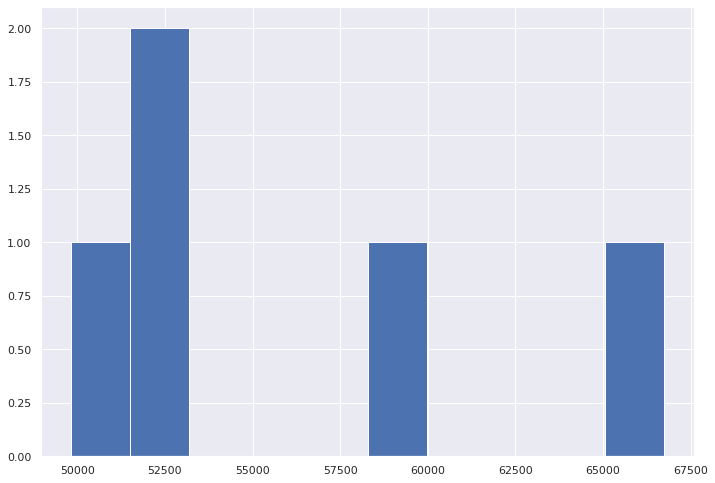

In [ ]:
#A discretização é uma etapa de pré-processamento de dados que muitas vezes é usada para transformar 
#um atributo de valor contínuo em um atributo categórico. O exemplo abaixo ilustra dois métodos simples,
#mas amplamente utilizados de discretização não supervisionados (largura igual e igual profundidade) 
#aplicados ao atributo 'ALUNO_COM_DEFICIENCIA' do conjunto de dados do ALUNO COM DEFICIENCIA.
df_dados_gerais['Aluno_co_Deficiencia'].hist(bins=10)
df_dados_gerais['Aluno_co_Deficiencia'].value_counts(sort=False)

In [ ]:
Z = (dados2-df_dados_gerais.mean())/dados2.std()
Z[20:25]

,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total


Text(0.5, 1.0, 'Variancia TP_GRAU_ACADEMICO dos cursos (variância = 0.5551)')

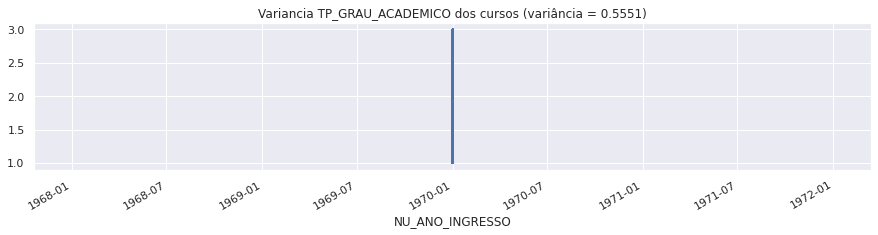

In [ ]:
variancia = pd.read_csv('/content/drive/MyDrive/alunoDeficiencia/alunodeficiencia_2019.csv',sep=',', encoding='latin-1')#header='infer')
variancia.index = pd.to_datetime(variancia['NU_ANO_INGRESSO'])
variancia = variancia['TP_GRAU_ACADEMICO']
ax = variancia.plot(kind='line',figsize=(15,3))
ax.set_title('Variancia TP_GRAU_ACADEMICO dos cursos (variância = %.4f)' % (variancia.var()))

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning:

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.



Text(0.5, 1.0, 'Variancia mensal do TP_GRAU_ACADEMICO (variancia = nan)')

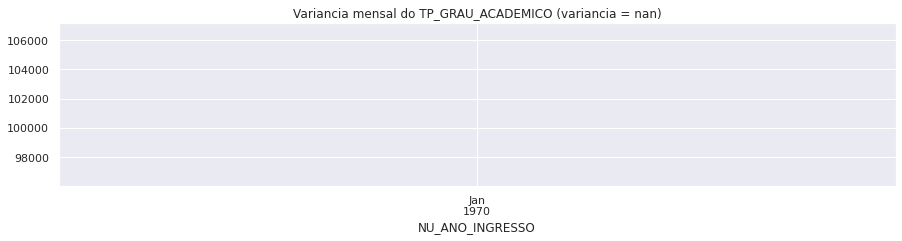

In [ ]:
mensal = variancia.groupby(pd.Grouper(freq='M')).sum()
ax = mensal.plot(kind='line',figsize=(15,3))
ax.set_title('Variancia mensal do TP_GRAU_ACADEMICO (variancia = %.4f)' % (mensal.var()))

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning:

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.



Text(0.5, 1.0, 'Variancia anual do TP_GRAU_ACADEMICO (variancia = nan)')

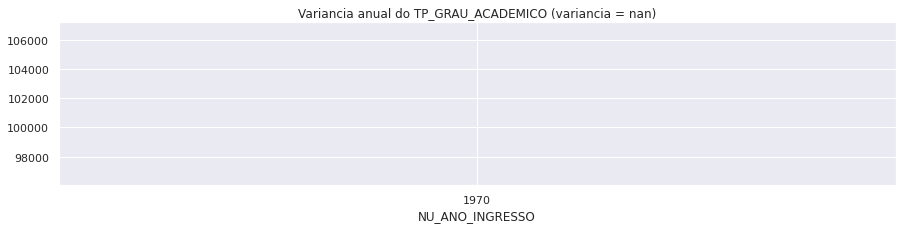

In [ ]:
annual = variancia.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Variancia anual do TP_GRAU_ACADEMICO (variancia = %.4f)' % (annual.var()))

In [ ]:
# Atributo quantitativo, calcule seus valores médios, de desvio padrão, mínimo e máximo.
for col in df_dados_gerais.columns:
    if is_numeric_dtype(df_dados_gerais[col]):
        print('%s:' % (col))
        print('\t Media = %.2f' % df_dados_gerais[col].mean())
        print('\t desvio padrão = %.2f' % df_dados_gerais[col].std())
        print('\t Minimo = %.2f' % df_dados_gerais[col].min())
        print('\t Maximo = %.2f' % df_dados_gerais[col].max())

Ano:
	 Media = 2017.00
	 desvio padrão = 1.58
	 Minimo = 2015.00
	 Maximo = 2019.00
Aluno_co_Deficiencia:
	 Media = 56057.20
	 desvio padrão = 7011.14
	 Minimo = 49813.00
	 Maximo = 66750.00
Aluno_total:
	 Media = 12539001.40
	 desvio padrão = 2194608.53
	 Minimo = 11187296.00
	 Maximo = 16425302.00
Populacao_total:
	 Media = 206815806.60
	 desvio padrão = 2637545.01
	 Minimo = 203475683.00
	 Maximo = 210147122.00


In [ ]:
#O atributo qualitativo (Populacao_total), conta a frequência para cada um de seus valores distintos.
df_dados_gerais['Populacao_total'].value_counts()

203475683    1
205156587    1
206804741    1
208494900    1
210147122    1
Name: Populacao_total, dtype: int64

In [ ]:
#função describe(). Se um atributo for quantitativo, ele exibirá seus valores médios, de desvio padrão e 
#vários quantiles (incluindo valores mínimos, medianos e máximos). Se um atributo for qualitativo, ele exibirá 
#seu número de valores únicos e os valores superiores (mais frequentes).
df_dados_gerais.describe(include='all')

,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total
count,5.000000,5.000000,5.000000e+00,5.000000e+00
mean,2017.000000,56057.200000,1.253900e+07,2.068158e+08
std,1.581139,7011.136049,2.194609e+06,2.637545e+06
min,2015.000000,49813.000000,1.118730e+07,2.034757e+08
25%,2016.000000,51685.000000,1.144922e+07,2.051566e+08
50%,2017.000000,52542.000000,1.158919e+07,2.068047e+08
75%,2018.000000,59496.000000,1.204399e+07,2.084949e+08
max,2019.000000,66750.000000,1.642530e+07,2.101471e+08


In [ ]:
#Para estatísticas multivariadas, você pode calcular a covariância e correlação entre pares de atributos.
print('Covariancia:')
df_dados_gerais.cov()

Covariancia:


,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total
Ano,2.50,9.953250e+03,2.767696e+06,4.170298e+06
Aluno_co_Deficiencia,9953.25,4.915603e+07,1.397667e+10,1.659956e+10
Aluno_total,2767695.75,1.397667e+10,4.816307e+12,4.612221e+12
Populacao_total,4170297.75,1.659956e+10,4.612221e+12,6.956644e+12


In [ ]:
print('Correlaçao:')
df_dados_gerais.corr()

Correlaçao:


,Ano,Aluno_co_Deficiencia,Aluno_total,Populacao_total
Ano,1.000000,0.897856,0.797611,0.999994
Aluno_co_Deficiencia,0.897856,1.000000,0.908361,0.897653
Aluno_total,0.797611,0.908361,1.000000,0.796807
Populacao_total,0.999994,0.897653,0.796807,1.000000


In [ ]:
                  # Parate 2- Cursos censo 2019 dados do Censo do Ensino Superior (INEP)


In [ ]:
#df_curso = pd.read_csv('/content/drive/MyDrive/tabelas_csv/dados/SUP_CURSO_2019.CSV', sep='|', encoding='latin-1')
#df_curso.head()

In [ ]:

df_curso = pd.read_csv('/content/drive/MyDrive/tabelas_csv/dados/SUP_CURSO_2019.CSV',
                       sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','CO_IES','CO_UF','CO_MUNICIPIO',
                                                             'CO_CURSO','NO_CURSO','CO_CINE_ROTULO','TP_SITUACAO',
                                                             'TP_GRAU_ACADEMICO','TP_MODALIDADE_ENSINO',
                                                             'IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL',
                                                             'IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL',
                                                             'IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO',
                                                             'IN_MATERIAL_BRAILLE',
                                                             'IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS',
                                                             'IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE',
                                                             'IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA',
                                                             'QT_MATRICULA_TOTAL','QT_CONCLUINTE_TOTAL'])
df_curso.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DIREITO,1,0421D01,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,1,0311E01,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,1,0732E01,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PEDAGOGIA,1,0113P01,2.0,1,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SERVIÇO SOCIAL,1,0923S01,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
df_curso.shape

(40709, 25)

In [ ]:
#Avaliando a quantidade de dados NaN na coluna referente à QT_VAGAS_ANUAL_NOTURNO
df_curso[df_curso['IN_MATERIAL_DIGITAL'].isnull()]


,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
1,2019,1,51.0,5103403.0,2,CIÊNCIAS ECONÔMICAS,1,0311E01,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,ENGENHARIA CIVIL,1,0732E01,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
5,2019,1,51.0,5103403.0,8,CIÊNCIAS CONTÁBEIS,1,0411C01,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296,33
6,2019,1,51.0,5103403.0,9,AGRONOMIA,1,0811A04,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382,41
7,2019,1,51.0,5103403.0,10,ENGENHARIA FLORESTAL,1,0821E01,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40702,2019,23705,35.0,3516408.0,1465936,GESTÃO DE ENERGIA E EFICIÊNCIA ENERGÉTICA,1,0713S01,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,0
40703,2019,23705,35.0,3516408.0,5001434,GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,1,0612G01,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,0
40704,2019,23713,33.0,3300407.0,1503889,SISTEMAS PARA INTERNET,1,0615S03,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,0
40705,2019,23725,53.0,5300108.0,1454890,GESTÃO PÚBLICA,1,0413G12,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,0


In [ ]:
#A porcentagem de dados NaN referentes à existência de material digital nos cursos é de 0,08%, ou seja,
# há 3308 dados NaN num total de 40709.
#Foram verificados também a quantidade de dados NaN de todos os outros recursos e o resultado foi o 
#mesmo, 3308 dados NaN OU 0,08% do total de dados registrados em curso.


In [ ]:
#Reduzindo os dados de 'NO_CURSO' apenas para a grande área
def grande_area(row):
  return row['NO_CURSO'][0:2]
df_curso['NO_CURSO'] = df_curso.apply(grande_area, axis=1)
df_curso.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DI,1,0421D01,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CI,1,0311E01,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,EN,1,0732E01,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PE,1,0113P01,2.0,1,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SE,1,0923S01,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Substituindo o código pela área de formação geral, conforme adaptação da Classificação Internacional Normalizada da Educação Cine/Unesco
area_formacao = {
    '01':'Educação',
    '02':'Artes e Humanidades',
    '03':'Ciências Sociais, Jornalismo e Informação',
    '04':'Negócios, Administração e Direito',
    '05':'Ciências naturais, Matemática e Estatística',
    '06':'Tecnologias da informação e Comunicação (TIC)',
    '07':'Engenharia, Produção e Construção',
    '08':'Agricultura, Veterinária, Recursos florestais e pesqueiros',
    '09':'Saúde e Bem-estar',
    '10':'Serviços',
}
df_curso = df_curso.astype({'CO_CINE_ROTULO':str})
df_curso.CO_CINE_ROTULO = df_curso.CO_CINE_ROTULO.map(area_formacao)
df_curso.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DI,1,NaN,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CI,1,NaN,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,EN,1,NaN,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PE,1,NaN,2.0,1,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SE,1,NaN,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Substituindo o código pelo tipo da situação de funcionamento do curso
tp_situacao = {
    '1':'Em atividade',
    '2':'Extinto',
    '3':'Em extinção',
}
df_curso = df_curso.astype({'TP_SITUACAO':str})
df_curso.TP_SITUACAO = df_curso.TP_SITUACAO.map(tp_situacao)
df_curso.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,TP_SITUACAO,CO_CINE_ROTULO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,1,DI,Em atividade,NaN,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CI,Em atividade,NaN,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,EN,Em atividade,NaN,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PE,Em atividade,NaN,2.0,1,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SE,Em atividade,NaN,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Renomeando as colunas
df_curso = df_curso.rename(columns={
    'NU_ANO_CENSO':'Ano_censo',
    'CO_IES':'Codigo_IES',
    'TP_CATEGORIA_ADMINISTRATIVA':'TP_categoria_administrativa',
    'TP_ORGANIZACAO_ACADEMICA':'TP_organizacao_academica',
    'CO_LOCAL_OFERTA':'Co_local_oferta',
    'CO_UF':'Co_UF',
    'CO_MUNICIPIO':'Co_municiṕio',
    'IN_CAPITAL':' Capital',
    'CO_CURSO':'Codigo_curso',
    'NO_CURSO':'Nome_curso',
    'TP_SITUACAO':'Cenario',
    'CO_CINE_ROTULO':'Area_formacao',
    'TP_GRAU_ACADEMICO':'Tipo_grau_academico',
    'TP_MODALIDADE_ENSINO':'Modalidade_ensino',
    'IN_AJUDA_DEFICIENTE':'Tipo_acess_deficiente',
    'IN_MATERIAL_DIGITAL':'Material_tecnologia',
    'IN_MATERIAL_AMPLIADO':'Material_acrescentado',
    'IN_MATERIAL_TATIL':'Material_concreto',
    'IN_MATERIAL_IMPRESSO':'Material_impresso',
    'IN_MATERIAL_AUDIO':'Material_audio',
    'IN_MATERIAL_BRAILLE':'Material_braille',
    'IN_MATERIAL_LIBRAS':'Material_libras',
    'IN_DISCIPLINA_LIBRAS':'Disciplina_libras',
    'IN_TRADUTOR_LIBRAS':'Tradutor_libras',
    'IN_GUIA_INTERPRETE':'Guia_iterprete',
    'IN_RECURSOS_COMUNICACAO':'Recursos_comunicacao',
    'IN_RECURSOS_INFORMATICA':'Recursos_computacao',
    'QT_MATRICULA_TOTAL':'Num_alunos_matriculados',
    'QT_CONCLUINTE_TOTAL':'Num_alunos_concluintes',
})
df_curso.head()

,Ano_censo,Codigo_IES,Co_UF,Co_municiṕio,Codigo_curso,Nome_curso,Cenario,Area_formacao,Tipo_grau_academico,Modalidade_ensino,...,Material_audio,Material_braille,Material_libras,Disciplina_libras,Tradutor_libras,Guia_iterprete,Recursos_comunicacao,Recursos_computacao,Num_alunos_matriculados,Num_alunos_concluintes
0,2019,1,51.0,5103403.0,1,DI,Em atividade,NaN,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CI,Em atividade,NaN,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,EN,Em atividade,NaN,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PE,Em atividade,NaN,2.0,1,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SE,Em atividade,NaN,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Substituindo o código pelo tipo do grau acadêmico conferido ao ao aluno pela conclusão dos requisitos exigidos pelo curso
grau_academico = {
    '1.0':'Bacharelado',
    '2.0':'Licenciatura',
    '3.0':'Tecnológico',
    '4.0':'Bacharelado e Licenciatura',
}
df_curso = df_curso.astype({'Tipo_grau_academico':str})
df_curso.Tipo_grau_academico = df_curso.Tipo_grau_academico.map(grau_academico)
df_curso.head()

,Ano_censo,Codigo_IES,Co_UF,Co_municiṕio,Codigo_curso,Nome_curso,Cenario,Area_formacao,Tipo_grau_academico,Modalidade_ensino,...,Material_audio,Material_braille,Material_libras,Disciplina_libras,Tradutor_libras,Guia_iterprete,Recursos_comunicacao,Recursos_computacao,Num_alunos_matriculados,Num_alunos_concluintes
0,2019,1,51.0,5103403.0,1,DI,Em atividade,NaN,Bacharelado,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CI,Em atividade,NaN,Bacharelado,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,EN,Em atividade,NaN,Bacharelado,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PE,Em atividade,NaN,Licenciatura,1,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SE,Em atividade,NaN,Bacharelado,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Substituindo o código pelo tipo da modalidade de ensino do curso
modalidade = {
    '1':'Presencial',
    '2':'Curso a distância',
}
df_curso = df_curso.astype({'Modalidade_ensino':str})
df_curso.Modalidade_ensino = df_curso.Modalidade_ensino.map(modalidade)
df_curso.head()

,Ano_censo,Codigo_IES,Co_UF,Co_municiṕio,Codigo_curso,Nome_curso,Cenario,Area_formacao,Tipo_grau_academico,Modalidade_ensino,...,Material_audio,Material_braille,Material_libras,Disciplina_libras,Tradutor_libras,Guia_iterprete,Recursos_comunicacao,Recursos_computacao,Num_alunos_matriculados,Num_alunos_concluintes
0,2019,1,51.0,5103403.0,1,DI,Em atividade,NaN,Bacharelado,Presencial,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,447,75
1,2019,1,51.0,5103403.0,2,CI,Em atividade,NaN,Bacharelado,Presencial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,28
2,2019,1,51.0,5103403.0,3,EN,Em atividade,NaN,Bacharelado,Presencial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,45
3,2019,1,51.0,5103403.0,6,PE,Em atividade,NaN,Licenciatura,Presencial,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,331,53
4,2019,1,51.0,5103403.0,7,SE,Em atividade,NaN,Bacharelado,Presencial,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,274,32


In [ ]:
#Contando a quantidade de curso por IES
num_alunos_ies = df_curso.groupby('Codigo_IES')[['Num_alunos_matriculados']].sum()
num_alunos_ies


,Num_alunos_matriculados
Codigo_IES,
1,20633
2,36292
3,24937
4,28424
5,28716
...,...
23713,92
23725,35
23867,169


In [ ]:
#Contando a quantidade de curso por IES
num_alunos_ies = df_curso.groupby('Codigo_IES')[['Num_alunos_matriculados']].sum()
num_alunos_ies

,Num_alunos_matriculados
Codigo_IES,
1,20633
2,36292
3,24937
4,28424
5,28716
...,...
23713,92
23725,35
23867,169


In [ ]:
#Transformando num dataframe
df_alunos_por_ies = pd.DataFrame(num_alunos_ies,columns=['Num_alunos_matriculados'])
df_alunos_por_ies['Codigo_IES'] = num_alunos_ies.index
df_alunos_por_ies.index = range(len(num_alunos_ies))
df_alunos_por_ies.head()

,Num_alunos_matriculados,Codigo_IES
0,20633,1
1,36292,2
2,24937,3
3,28424,4
4,28716,5


In [ ]:
#Para o atributo qualitativo (CODIGO_IES), conte a frequência para cada um de seus valores distintos
df_curso['Codigo_IES'].value_counts()

322      928
163      563
55       296
316      284
3172     247
        ... 
5021       1
5020       1
5018       1
5017       1
24672      1
Name: Codigo_IES, Length: 2608, dtype: int64

In [ ]:
#Também é possível exibir o resumo de todos os atributos simultaneamente em uma tabela usando a função 
#describe. Se um atributo for quantitativo, ele exibirá seus valores de média, desvio padrão e vários 
#quantis (incluindo mínimo, mediano e máximo). Se um atributo for qualitativo, ele exibirá seu número de 
#valores exclusivos e os valores principais (mais frequentes).

In [ ]:
df_curso.describe(include='all')

,Ano_censo,Codigo_IES,Co_UF,Co_municiṕio,Codigo_curso,Nome_curso,Cenario,Area_formacao,Tipo_grau_academico,Modalidade_ensino,...,Material_audio,Material_braille,Material_libras,Disciplina_libras,Tradutor_libras,Guia_iterprete,Recursos_comunicacao,Recursos_computacao,Num_alunos_matriculados,Num_alunos_concluintes
count,40709.0,40709.000000,36178.000000,3.617800e+04,4.070900e+04,40709,40709,0,40427,40709,...,37401.000000,37401.000000,37401.000000,37401.000000,37401.000000,37401.000000,37401.000000,37401.000000,40709.000000,40709.000000
unique,NaN,NaN,NaN,NaN,NaN,102,3,0,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,EN,Em atividade,NaN,Bacharelado,Presencial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,6440,39750,NaN,24402,36178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2019.0,2742.834705,33.653298,3.382895e+06,7.855399e+05,NaN,NaN,NaN,NaN,NaN,...,0.508382,0.396888,0.490388,0.885992,0.745996,0.409936,0.678565,0.777038,211.366676,30.711612
std,0.0,4623.214287,9.561096,9.571050e+05,8.843156e+05,NaN,NaN,NaN,NaN,NaN,...,0.499936,0.489259,0.499914,0.317825,0.435306,0.491828,0.467034,0.416239,939.616452,153.859964
min,2019.0,1.000000,11.000000,1.100023e+06,1.000000e+00,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.0,426.000000,29.000000,2.914802e+06,7.028800e+04,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,37.000000,0.000000
50%,2019.0,1082.000000,35.000000,3.506003e+06,1.080171e+06,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,103.000000,12.000000
75%,2019.0,2576.000000,41.000000,4.106902e+06,1.315657e+06,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,211.000000,32.000000


In [ ]:
#Contando a quantidade de curso por IES
num_cursos_por_ies = df_curso.groupby('Codigo_IES')[['Codigo_curso']].count()
num_cursos_por_ies

,Codigo_curso
Codigo_IES,
1,114
2,149
3,116
4,107
5,100
...,...
23713,1
23725,1
23867,1


In [ ]:
#Transformando num dataframe
df_cursos_por_ies = pd.DataFrame(num_cursos_por_ies,columns=['Codigo_curso'])
df_cursos_por_ies['Codigo'] = num_cursos_por_ies.index
df_cursos_por_ies.index = range(len(num_cursos_por_ies))
df_cursos_por_ies.head()

,Codigo_curso,Codigo
0,114,1
1,149,2
2,116,3
3,107,4
4,100,5


In [ ]:
#Para estatísticas multivariadas,você pode calcular a covariância e a correlação entre pares de atributos
print('Covariância:')
df_curso.cov()


Covariância:


,Ano_censo,Codigo_IES,Co_UF,Co_municiṕio,Codigo_curso,Tipo_grau_academico,Modalidade_ensino,Tipo_acess_deficiente,Material_tecnologia,Material_acrescentado,...,Material_audio,Material_braille,Material_libras,Disciplina_libras,Tradutor_libras,Guia_iterprete,Recursos_comunicacao,Recursos_computacao,Num_alunos_matriculados,Num_alunos_concluintes
Ano_censo,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
Codigo_IES,0.0,2.137411e+07,-2.818218e+03,-2.865267e+08,7.945048e+08,41.676315,-124.556870,-5.066468,-166.854651,-185.962648,...,-251.626027,-289.584089,-159.829729,-141.264557,-80.064079,-2.252760,-142.189755,-47.422042,-1.989645e+05,-3.656820e+04
Co_UF,0.0,-2.818218e+03,9.141455e+01,9.149312e+06,-2.478130e+05,0.012901,0.000000,0.110187,0.612037,0.835773,...,0.508515,0.281539,0.526781,0.227314,0.256733,0.271985,0.475457,0.320229,-7.869345e+01,-4.037564e+00
Co_municiṕio,0.0,-2.865267e+08,9.149312e+06,9.160501e+11,-2.523167e+10,1696.488867,0.000000,11262.905821,61963.349170,84630.539835,...,51184.113178,28691.676158,53385.085403,22939.442925,26494.460717,27287.059170,48467.290904,32516.436704,-7.754004e+06,-3.752318e+05
Codigo_curso,0.0,7.945048e+08,-2.478130e+05,-2.523167e+10,7.820141e+11,77569.077829,53528.067585,-4625.742522,-2083.522593,-5176.791194,...,-5709.606856,-18475.549849,-10488.732617,-1609.522544,-2194.148506,2924.348829,-3046.723618,-2207.680992,-3.692646e+07,-8.881020e+06
Tipo_grau_academico,0.0,4.167631e+01,1.290073e-02,1.696489e+03,7.756908e+04,0.654728,0.060597,-0.005738,0.000323,-0.006458,...,0.006323,-0.008614,-0.011497,-0.005409,-0.001272,-0.008419,-0.007318,-0.002636,-2.585529e+01,-1.343200e+00
Modalidade_ensino,0.0,-1.245569e+02,0.000000e+00,0.000000e+00,5.352807e+04,0.060597,0.098916,0.002093,0.010323,0.002846,...,0.016722,-0.002566,0.003070,0.003912,0.005161,0.009321,0.009718,0.005993,3.666509e+01,4.345232e+00
Tipo_acess_deficiente,0.0,-5.066468e+00,1.101867e-01,1.126291e+04,-4.625743e+03,-0.005738,0.002093,0.074658,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.418959e+00,9.570849e-01
Material_tecnologia,0.0,-1.668547e+02,6.120374e-01,6.196335e+04,-2.083523e+03,0.000323,0.010323,0.000000,0.231306,0.122311,...,0.124943,0.090591,0.120466,0.032623,0.062703,0.070732,0.131630,0.104327,2.040626e+01,2.728840e+00
Material_acrescentado,0.0,-1.859626e+02,8.357732e-01,8.463054e+04,-5.176791e+03,-0.006458,0.002846,0.000000,0.122311,0.235391,...,0.108619,0.098034,0.119310,0.038489,0.076350,0.092820,0.117951,0.091380,1.540132e+01,2.107469e+00


In [ ]:
print('Correlação:')
df_curso.corr()


Correlação:


,Ano_censo,Codigo_IES,Co_UF,Co_municiṕio,Codigo_curso,Tipo_grau_academico,Modalidade_ensino,Tipo_acess_deficiente,Material_tecnologia,Material_acrescentado,...,Material_audio,Material_braille,Material_libras,Disciplina_libras,Tradutor_libras,Guia_iterprete,Recursos_comunicacao,Recursos_computacao,Num_alunos_matriculados,Num_alunos_concluintes
Ano_censo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Codigo_IES,NaN,1.000000,-0.061641,-0.062605,0.194332,0.011120,-0.085662,-0.004011,-0.075229,-0.083114,...,-0.109140,-0.128345,-0.069327,-0.096380,-0.039883,-0.000993,-0.066018,-0.024705,-0.045802,-0.051408
Co_UF,NaN,-0.061641,1.000000,0.999818,-0.028730,0.001731,NaN,0.041633,0.133241,0.181253,...,0.107207,0.060571,0.111071,0.074144,0.061697,0.058524,0.106369,0.080228,-0.033901,-0.010031
Co_municiṕio,NaN,-0.062605,0.999818,1.000000,-0.029221,0.002274,NaN,0.042511,0.134785,0.183388,...,0.107820,0.061678,0.112470,0.074761,0.063619,0.058667,0.108343,0.081398,-0.033369,-0.009313
Codigo_curso,NaN,0.194332,-0.028730,-0.029221,1.000000,0.115776,0.192460,-0.019144,-0.004944,-0.012178,...,-0.013034,-0.043098,-0.023946,-0.005780,-0.005753,0.006786,-0.007445,-0.006053,-0.044441,-0.065272
Tipo_grau_academico,NaN,0.011120,0.001731,0.002274,0.115776,1.000000,0.237438,-0.026010,0.000830,-0.016434,...,0.015621,-0.021764,-0.028406,-0.020994,-0.003612,-0.021133,-0.019345,-0.007818,-0.033893,-0.010753
Modalidade_ensino,NaN,-0.085662,NaN,NaN,0.192460,0.237438,1.000000,0.024351,0.067648,0.018488,...,0.105412,-0.016531,0.019356,0.038790,0.037362,0.059725,0.065578,0.045377,0.124070,0.089795
Tipo_acess_deficiente,NaN,-0.004011,0.041633,0.042511,-0.019144,-0.026010,0.024351,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021107,0.022766
Material_tecnologia,NaN,-0.075229,0.133241,0.134785,-0.004944,0.000830,0.067648,NaN,1.000000,0.524177,...,0.519642,0.384994,0.501041,0.213422,0.299504,0.299027,0.586023,0.521149,0.043394,0.035444
Material_acrescentado,NaN,-0.083114,0.181253,0.183388,-0.012178,-0.016434,0.018488,NaN,0.524177,1.000000,...,0.447812,0.412993,0.491912,0.249605,0.361508,0.388986,0.520545,0.452496,0.032465,0.027135


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



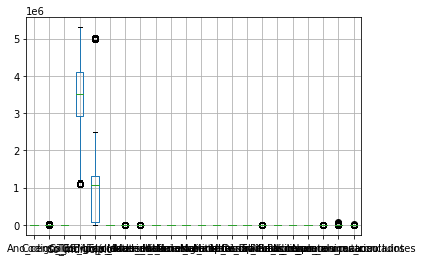

In [ ]:
df_curso.boxplot()

In [ ]:
#Exportando o dataframe para um arquivo csv
df_curso.to_csv('df_curso.csv', sep=',')
df_curso.head()

In [ ]:


#Parte 2.1 Dados do Censo do Ensino Superior (INEP) Censo 2019 - IES

In [ ]:


#Carregando os dados das IES
ies_censo_IES_2019 = ('/content/drive/MyDrive/tabelas_csv/dados/SUP_IES_2019.CSV')
df_censo_ies = pd.read_csv(ies_censo_IES_2019, sep='|', encoding='latin-1',
                           usecols=['CO_IES','NO_IES','SG_IES','TP_CATEGORIA_ADMINISTRATIVA',
                          'TP_ORGANIZACAO_ACADEMICA','CO_REGIAO','CO_UF'])
df_censo_ies.head()

,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_REGIAO,CO_UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,51
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,53
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,28
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,13
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,31


In [ ]:
#Renomeando as colunas
df_ies = df_censo_ies.rename(columns={
    'CO_IES':'Codigo_IES',
    'NO_IES':'Nome_IES',
    'SG_IES':'Sigla_IES',
    'TP_CATEGORIA_ADMINISTRATIVA':'Tipo_categoria_adm',
    'TP_ORGANIZACAO_ACADEMICA':'Tipo_org_academica',
    'CO_REGIAO':'Regiao',
    'CO_UF':'UF'
    })
df_ies.head()

,Codigo_IES,Nome_IES,Sigla_IES,Tipo_categoria_adm,Tipo_org_academica,Regiao,UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,51
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,53
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,28
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,13
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,31


In [ ]:
#Substituindo o código pelo nome das unidades federativas
uf = {
    '11':'Rondônia',
    '12':'Acre',
    '13':'Amazonas',
    '14':'Roraima',
    '15':'Pará',
    '16':'Amapá',
    '17':'Tocantins',
    '21':'Maranhão',
    '22':'Piauí',
    '23':'Ceará',
    '24':'Rio Grande do Norte',
    '25':'Paraíba',
    '26':'Pernambuco',
    '27':'Alagoas',
    '28':'Sergipe',
    '29':'Bahia',
    '31':'Minas Gerais',
    '32':'Espírito Santo',
    '33':'Rio de Janeiro',
    '35':'São Paulo',
    '41':'Paraná',
    '42':'Santa Catarina',
    '43':'Rio Grande do Sul',
    '50':'Mato Grosso do Sul',
    '51':'Mato Grosso',
    '52':'Goiás',
    '53':'Distrito Federal',
}
df_ies = df_ies.astype({'UF':str})
df_ies.UF = df_ies.UF.map(uf)
df_ies.head()

	

,Codigo_IES,Nome_IES,Sigla_IES,Tipo_categoria_adm,Tipo_org_academica,Regiao,UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,5,Mato Grosso
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,5,Distrito Federal
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,2,Sergipe
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,1,Amazonas
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,3,Minas Gerais


In [ ]:
#Substituindo o código pelo nome das regiões
regiao = {
    '1':'Norte',
    '2':'Nordeste',
    '3':'Sudeste',
    '4':'Sul',
    '5':'Centro-Oeste',
}
df_ies = df_ies.astype({'Regiao':str})
df_ies.Regiao = df_ies.Regiao.map(regiao)
df_ies.head()

,Codigo_IES,Nome_IES,Sigla_IES,Tipo_categoria_adm,Tipo_org_academica,Regiao,UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,1,Centro-Oeste,Mato Grosso
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,1,Centro-Oeste,Distrito Federal
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,1,Nordeste,Sergipe
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,1,Norte,Amazonas
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,1,Sudeste,Minas Gerais


In [ ]:
#Substituindo o código pelo tipo de categoria administrativa
categoria_adm = {
    '1':'Pública Federal',
    '2':'Pública Estadual',
    '3':'Pública Municipal',
    '4':'Privada com fins lucrativos',
    '5':'Privada sem fins lucrativos',
    '6':'Privada - Particular em sentido estrito',
    '7':'Especial',
    '8':'Privada comunitária',
    '9':'Privada confessional',
}
df_ies = df_ies.astype({'Tipo_categoria_adm':str})
df_ies.Tipo_categoria_adm = df_ies.Tipo_categoria_adm.map(categoria_adm)
df_ies.head()

,Codigo_IES,Nome_IES,Sigla_IES,Tipo_categoria_adm,Tipo_org_academica,Regiao,UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,1,Centro-Oeste,Mato Grosso
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,Pública Federal,1,Centro-Oeste,Distrito Federal
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Pública Federal,1,Nordeste,Sergipe
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Pública Federal,1,Norte,Amazonas
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,Pública Federal,1,Sudeste,Minas Gerais


In [ ]:
#Substituindo o código pelo tipo de organização acadêmica
org_academica = {
    '1':'Universidade',
    '2':'Centro Universitário',
    '3':'Faculdade',
    '4':'Instituto Federal de Educação, Ciência e Tecnologia',                               
    '5':'Centro Federal de Educação Tecnológica',
}
df_ies = df_ies.astype({'Tipo_org_academica':str})
df_ies.Tipo_org_academica = df_ies.Tipo_org_academica.map(org_academica)
df_ies.head()


,Codigo_IES,Nome_IES,Sigla_IES,Tipo_categoria_adm,Tipo_org_academica,Regiao,UF
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Pública Federal,Universidade,Centro-Oeste,Mato Grosso
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,Pública Federal,Universidade,Centro-Oeste,Distrito Federal
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Pública Federal,Universidade,Nordeste,Sergipe
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Pública Federal,Universidade,Norte,Amazonas
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,Pública Federal,Universidade,Sudeste,Minas Gerais


In [ ]:
#Exportando o dataframe para um arquivo csv
df_ies.to_csv('df_ies.csv', sep=',')
df_ies.head()

In [ ]:
#              Parte    Censo 2019 - Alunos com deficiência

In [ ]:
#Selecionanado apenas as colunas que serão analisadas 
df_aluno = pd.read_csv('/content/drive/MyDrive/tabelas_csv/dados/alunodeficiente_2019.csv', 
                       encoding='latin-1', usecols=['NU_ANO_CENSO','CO_CURSO','CO_IES','ID_ALUNO',
                        'TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','CO_PAIS_ORIGEM','TP_SITUACAO',
                        'IN_MATRICULA','IN_CONCLUINTE','IN_DEFICIENCIA','IN_DEFICIENCIA_AUDITIVA',
                        'IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA',
                        'IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO',
                        'IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER',
                        'IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO','IN_RESERVA_DEFICIENCIA'])
df_aluno.head()

,NU_ANO_CENSO,CO_IES,CO_CURSO,ID_ALUNO,TP_COR_RACA,TP_SEXO,NU_ANO_NASCIMENTO,CO_PAIS_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,TP_SITUACAO,IN_RESERVA_DEFICIENCIA,IN_MATRICULA,IN_CONCLUINTE
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,3,2,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,3,1,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,3,2,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
3,2019,1,1,70F6C562984F1CC4EB1A287A8EC1AF9F,3,1,1984,76,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,3,2,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0


In [ ]:
#Renomeando as colunas
df_curso = df_aluno.rename(columns={
    'NU_ANO_CENSO':'Nu_ano_censo',
    'CO_IES':'Co_IES',
    'CO_CURSO':'Co_curso',
    'ID_ALUNO':'Id_aluno',
    'TP_COR_RACA':'TP_cor_raca',
    'TP_SEXO':'TP_sexo',
    'NUM_ANO_NASCIMENTO':'Num_ano_nascimento',
    'CO_PAIS_ORIGEM':'Co_pais_origem',
    'IND_DEFICIENCIA':'Ind_deficiencia',
    'IND_DEFICIENCIA_AUDITIVA':'Ind_deficiencia_auditiva',
    'IND_DEFICIENCIA_CEGUEIRA':'Ind_deficiencia_cegueira',
    'IND_DEFICIENCIA_SUPERDOTACAO':'Ind_deficiencia_superdotado',
    
})
df_curso.head()

,Nu_ano_censo,Co_IES,Co_curso,Id_aluno,TP_cor_raca,TP_sexo,NU_ANO_NASCIMENTO,Co_pais_origem,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,TP_SITUACAO,IN_RESERVA_DEFICIENCIA,IN_MATRICULA,IN_CONCLUINTE
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,3,2,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,3,1,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,3,2,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
3,2019,1,1,70F6C562984F1CC4EB1A287A8EC1AF9F,3,1,1984,76,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,3,2,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0


In [ ]:
#Avaliando so campos de surdez, cegueira e surdocegueira
df_ad = df_aluno[['IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_INTELECTUAL',
                  'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 
                  'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 
                  'IN_TGD_AUTISMO', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO']]
df_ad.loc[df_aluno['IN_DEFICIENCIA_SURDOCEGUEIRA'] == 1]


,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
500,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1879,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2406,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2432,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60444,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66163,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66357,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_aluno.dtypes

NU_ANO_CENSO                        int64
CO_IES                              int64
CO_CURSO                            int64
ID_ALUNO                           object
TP_COR_RACA                         int64
TP_SEXO                             int64
NU_ANO_NASCIMENTO                   int64
CO_PAIS_ORIGEM                      int64
IN_DEFICIENCIA                      int64
IN_DEFICIENCIA_AUDITIVA           float64
IN_DEFICIENCIA_FISICA             float64
IN_DEFICIENCIA_INTELECTUAL        float64
IN_DEFICIENCIA_MULTIPLA           float64
IN_DEFICIENCIA_SURDEZ             float64
IN_DEFICIENCIA_SURDOCEGUEIRA      float64
IN_DEFICIENCIA_BAIXA_VISAO        float64
IN_DEFICIENCIA_CEGUEIRA           float64
IN_DEFICIENCIA_SUPERDOTACAO       float64
IN_TGD_AUTISMO                    float64
IN_TGD_SINDROME_ASPERGER          float64
IN_TGD_SINDROME_RETT              float64
IN_TGD_TRANSTOR_DESINTEGRATIVO    float64
TP_SITUACAO                         int64
IN_RESERVA_DEFICIENCIA            

In [ ]:
df_aluno.head(5)

,NU_ANO_CENSO,CO_IES,CO_CURSO,ID_ALUNO,TP_COR_RACA,TP_SEXO,NU_ANO_NASCIMENTO,CO_PAIS_ORIGEM,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,TP_SITUACAO,IN_RESERVA_DEFICIENCIA,IN_MATRICULA,IN_CONCLUINTE
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,3,2,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,3,1,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,3,2,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
3,2019,1,1,70F6C562984F1CC4EB1A287A8EC1AF9F,3,1,1984,76,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,3,2,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0


In [ ]:
#Conclui-se que para um aluno com a deficiencia surdez e cegueira obter verdadeiro para a coluna 'IN_DEFICIENCIA_MULTIPLA',
# o estudante tem que ter alguma outra deficiencia além da surdez e cegueira.
df_ad.loc[df_aluno['IN_DEFICIENCIA_MULTIPLA'] == 1]

,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO
31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66467,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66473,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66482,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66484,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Renomeando as colunas
df_aluno = df_aluno.rename(columns={
    'NU_ANO_CENSO':'Ano_censo',
    'CO_IES':'Codigo_IES',
    'CO_CURSO':'Codigo_curso',
    'ID_ALUNO':'Codigo_INEP',
    'TP_COR_RACA':'Raca',
    'TP_SEXO':'Genero',
    'NU_ANO_NASCIMENTO':'Ano_Nascimento',
    'CO_PAIS_ORIGEM':'Pais_de_Origem',
    'TP_SITUACAO':'Vinculo_Curso',
    'IN_RESERVA_DEFICIENCIA':'Ingesso_Reserva_Deficiencia',
    'IN_MATRICULA':'Aluno_Matriculado',
    'IN_CONCLUINTE':'Aluno_Concluinte'
    })
df_aluno.head()

,Ano_censo,Codigo_IES,Codigo_curso,Codigo_INEP,Raca,Genero,Ano_Nascimento,Pais_de_Origem,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,Vinculo_Curso,Ingesso_Reserva_Deficiencia,Aluno_Matriculado,Aluno_Concluinte
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,3,2,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,3,1,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,3,2,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
3,2019,1,1,70F6C562984F1CC4EB1A287A8EC1AF9F,3,1,1984,76,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,3,2,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0


In [ ]:
#Verificando se há CODIGO_INEP duplicaado
#df_aluno['CODIGO_INEP'].duplicated()


In [ ]:
#Excluindo a coluna código inep
#df_aluno = df_aluno.drop(columns=['CODIGO_INEP'])

In [ ]:
#Substituindo o código pela raça
raca = {
    '0':'Aluno não quis declarar cor/raça',   
    '1':'Branca',
    '2':'Preta',
    '3':'Parda',
    '4':'Amarela',
    '5':'Indígena',
    '9':'Não dispõe da informação',
}
df_aluno = df_aluno.astype({'Raca':str})
df_aluno.Raca = df_aluno.Raca.map(raca)
df_aluno.head()

,Ano_censo,Codigo_IES,Codigo_curso,Codigo_INEP,Raca,Genero,Ano_Nascimento,Pais_de_Origem,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,Vinculo_Curso,Ingesso_Reserva_Deficiencia,Aluno_Matriculado,Aluno_Concluinte
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,2,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,1,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,2,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
3,2019,1,1,70F6C562984F1CC4EB1A287A8EC1AF9F,Parda,1,1984,76,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,2,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0


In [ ]:
#Substituindo código por gênero
genero = {
    '1':'Feminino',
    '2':'Masculino',
}
df_aluno = df_aluno.astype({'Genero':str})
df_aluno.Genero = df_aluno.Genero.map(genero)
df_aluno.head()

,Ano_censo,Codigo_IES,Codigo_curso,Codigo_INEP,Raca,Genero,Ano_Nascimento,Pais_de_Origem,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,Vinculo_Curso,Ingesso_Reserva_Deficiencia,Aluno_Matriculado,Aluno_Concluinte
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,Masculino,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,Feminino,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,Masculino,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0
3,2019,1,1,70F6C562984F1CC4EB1A287A8EC1AF9F,Parda,Feminino,1984,76,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,Masculino,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0,1,0


In [ ]:
#Substituindo código por situação do vínculo do aluno com o curso
vinculo = {
    '1':'Falta',
    '2':'Cursando',
    '3':'Matrícula trancada',
    '4':'Desvinculado do curso',
    '5':'Transferido para outro curso da mesma IES',
    '6':'Formado',
    '7':'Falecido',     
}
df_aluno = df_aluno.astype({'Vinculo_Curso':str})
df_aluno.Vinculo_Curso = df_aluno.Vinculo_Curso.map(vinculo)
df_aluno.head()

,Ano_censo,Codigo_IES,Codigo_curso,Codigo_INEP,Raca,Genero,Ano_Nascimento,Pais_de_Origem,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,Vinculo_Curso,Ingesso_Reserva_Deficiencia,Aluno_Matriculado,Aluno_Concluinte
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,Masculino,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,Feminino,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,Masculino,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
3,2019,1,1,70F6C562984F1CC4EB1A287A8EC1AF9F,Parda,Feminino,1984,76,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Matrícula trancada,1.0,0,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,Masculino,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0


In [ ]:
df_aluno = df_aluno.loc[df_aluno['Vinculo_Curso'] == 'Cursando']
df_aluno.head()


,Ano_censo,Codigo_IES,Codigo_curso,Codigo_INEP,Raca,Genero,Ano_Nascimento,Pais_de_Origem,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,Vinculo_Curso,Ingesso_Reserva_Deficiencia,Aluno_Matriculado,Aluno_Concluinte
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,Masculino,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,Feminino,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,Masculino,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,Masculino,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0
5,2019,1,1,858BBEB67B4F70BE42F9A85BF4191ADF,Branca,Masculino,1988,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,1.0,1,0


In [ ]:
#Substituindo código por informação se o aluno ingressou no ensino superior a partir de vagas reservadas a pessoas com deficiência
reserva_vagas = {
    '0.0':'Não',
    '1.0':'Sim',
}
df_aluno = df_aluno.astype({'Ingesso_Reserva_Deficiencia':str})
df_aluno.Ingesso_Reserva_Deficiencia = df_aluno.Ingesso_Reserva_Deficiencia.map(reserva_vagas)
df_aluno.head()


,Ano_censo,Codigo_IES,Codigo_curso,Codigo_INEP,Raca,Genero,Ano_Nascimento,Pais_de_Origem,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,Vinculo_Curso,Ingesso_Reserva_Deficiencia,Aluno_Matriculado,Aluno_Concluinte
0,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,Masculino,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0
1,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,Feminino,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0
2,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,Masculino,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,Masculino,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0
5,2019,1,1,858BBEB67B4F70BE42F9A85BF4191ADF,Branca,Masculino,1988,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0


In [ ]:
#Verificando se todos os alunos estão matriculados regularmente
df_aluno.loc[df_aluno['Aluno_Matriculado'] == '1']

,Ano_censo,Codigo_IES,Codigo_curso,Codigo_INEP,Raca,Genero,Ano_Nascimento,Pais_de_Origem,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,Vinculo_Curso,Ingesso_Reserva_Deficiencia,Aluno_Matriculado,Aluno_Concluinte


In [ ]:
#Inserindo a id do aluno a partir do index do dataframe
df_aluno.index = range(1,len(df_aluno.index)+1)
df_aluno['ID_ALUNO'] = df_aluno.index
df_aluno.head()

,Ano_censo,Codigo_IES,Codigo_curso,Codigo_INEP,Raca,Genero,Ano_Nascimento,Pais_de_Origem,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,...,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,Vinculo_Curso,Ingesso_Reserva_Deficiencia,Aluno_Matriculado,Aluno_Concluinte,ID_ALUNO
1,2019,1,1,BD8D4626244A839A308F0AA4240CE43F,Parda,Masculino,1989,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0,1
2,2019,1,1,5EF5CD63C43D9B59200FDFCD2E1ACE36,Parda,Feminino,1982,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0,2
3,2019,1,1,2E56350182EF8B7FFF2C114F0B52B7DD,Parda,Masculino,1978,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0,3
4,2019,1,1,C6DDD99D39270AB04FE9382687D38C31,Parda,Masculino,1992,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0,4
5,2019,1,1,858BBEB67B4F70BE42F9A85BF4191ADF,Branca,Masculino,1988,76,1,0.0,...,0.0,0.0,0.0,0.0,0.0,Cursando,Sim,1,0,5


In [ ]:
#Organizando as colunas do dataframe
df_aluno = df_aluno[['ID_ALUNO','CODIGO_IES','CODIGO_CURSO','RACA','PAIS_ORIGEM','GENERO','ANO_NASCIMENTO','VINCULO_CURSO','INGRESSO_RESERVA_DEFICIENCIA','ALUNO_CONCLUINTE','IN_DEFICIENCIA_AUDITIVA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA','IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER','IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO']]
df_aluno.head()


In [ ]:
#Realizando análise de componentes principais Existem vários termos que devemos definir antes de discutir como funciona a análise de 
#componentes principais.
#Variância, covariância e covariância
#Matrizes.
#Lembre-se de que a variância é uma medida de como um conjunto de valores se espalhou. Variância é calculada como a média das diferenças 
#quadradas dos valores e média dos valores, conforme a seguinte equação

In [ ]:
#A análise de componentes principais (PCA) é um método clássico para reduzir o número de atributos nos dados
#projetando os dados de seu espaço original de alta dimensão para um espaço de menor dimensão. Os novos atributos
#(também conhecidos como componentes) criados pelo PCA têm as seguintes propriedades: (1) são combinações lineares
#dos atributos originais, (2) são ortogonais (perpendiculares) entre si e (3) capturam a quantidade máxima de 
#variação nos dados.
#A aplicação do PCA em um conjunto de dados de imagem. Existem 16 arquivos RGB, cada um deles tem um tamanho de
#111 x 111 pixels. O código de exemplo abaixo lerá cada arquivo de imagem e converterá a imagem RGB em um 
#111 x 111 x 3 = 36963 valores de recurso. Isso criará uma matriz de dados do tamanho 16 x 36963.

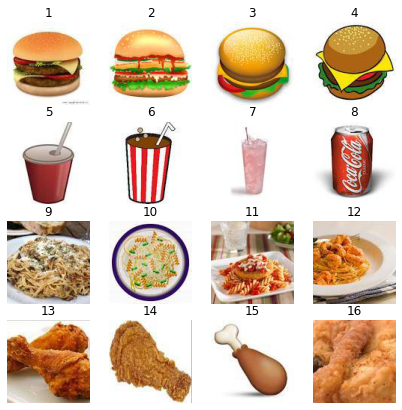

In [ ]:
imagens = 16
fig = plt.figure(figsize=(7,7))
imgaDado = np.zeros(shape=(imagens,36963))

for i in range(1,imagens+1):
    arquivo = '/content/drive/MyDrive/tabelas_csv/imagem/Picture'+str(i)+'.jpg'
    imga = mpimg.imread(arquivo)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(imga)
    plt.axis('off')
    ax.set_title(str(i))
    imgaDado[i-1] = np.array(imga.flatten()).reshape(1,imga.shape[0]*imga.shape[1]*imga.shape[2])

In [ ]:
#Usando PCA, a matriz de dados é projetada para seus dois primeiros componentes principais. Os valores projetados 
#dos dados de imagem originais são armazenados em um objeto pandas DataFrame chamado projetado.

In [ ]:
numComponentes = 2
pca = PCA(n_components=numComponentes)
pca.fit(imgaDado)

projeto = pca.transform(imgaDado)
projeto = pd.DataFrame(projeto,columns=['Foto1','Foto2'],index=range(1,imagens+1))
projeto['Lanche'] = ['hambúrguer', 'hambúrguer','hambúrguer','hambúrguer','bebida','bebida','bebida','bebida',
                       'massa', 'massa', 'massa', 'massa', 'frango', 'frango', 'frango', 'frango'] 
projeto

,Foto1,Foto2,Lanche
1,-1576.759355,6640.734923,hambúrguer
2,-493.799031,6397.620802,hambúrguer
3,990.092433,7236.013006,hambúrguer
4,2189.873202,9051.195566,hambúrguer
5,-7842.982510,-1061.760094,bebida
6,-8498.411630,-5438.449184,bebida
7,-11181.868392,-5319.696611,bebida
8,-6851.943156,1124.910720,bebida
9,7635.131359,-5043.762598,massa
10,-708.053481,-528.850020,massa


In [ ]:
#Finalmente, desenhamos um gráfico de dispersão para exibir os valores projetados. Observe que as imagens de 
#hambúrgueres, bebidas e massas são projetadas para a mesma região. No entanto, as imagens para frango frito 
#(mostrado como quadrados pretos no diagrama) são mais difíceis de discriminar.

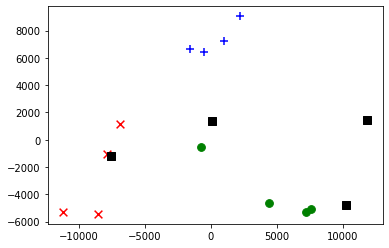

In [ ]:
cores = {'hambúrguer':'b', 'bebida':'r', 'massa':'g', 'frango':'k'}
sanduiche = {'hambúrguer':'+', 'bebida':'x', 'massa':'o', 'frango':'s'} 

for tipoComida in sanduiche:
    d = projeto[projeto['Lanche']==tipoComida]
    plt.scatter(d['Foto1'],d['Foto2'],c=cores[tipoComida],s=60,marker=sanduiche[tipoComida])

In [ ]:
#calcular a matriz de covariância para o seguinte conjunto de dados:
import numpy as np
X = [[2, 0, -1.4],[2.2, 0.2, -1.5],[2.4, 0.1, -1],[1.9, 0, -1.2]]
print(np.cov(np.array(X).T))

[[ 0.04916667  0.01416667  0.01916667]
 [ 0.01416667  0.00916667 -0.00583333]
 [ 0.01916667 -0.00583333  0.04916667]]


In [ ]:
#Unindo as informações sobre IES e Curso

In [ ]:
# parte 3 - Análise Exploratória de Dados 

In [ ]:
df_curso['Codigo_IES'].duplicated()

0       False
0        True
0        True
0        True
0        True
        ...  
2606    False
2607    False
2607     True
2607     True
2607     True
Name: Codigo_IES, Length: 40709, dtype: bool